In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install statsmodels

In [3]:
import statsmodels.api as sm

In [4]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto2 = pd.DataFrame(auto)
auto2['horsepower'] = pd.to_numeric(auto2['horsepower'], errors='coerce')
auto2.dropna(subset=['mpg', 'horsepower'], inplace=True)
X = auto2['horsepower']
y = auto2['mpg']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        19:08:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

The P value is 0, indicating that there is a lot of association between horsepower and mpg. 
To get the mpg when horsepower is 98, you plug it into the formula - mpg = 39.9359 + (-0.1578(98)) to get 24.48 mpg.

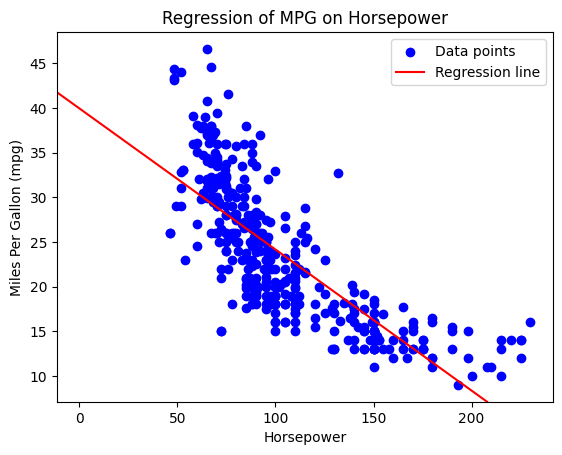

In [6]:
intercept = model.params['const']
slope = model.params['horsepower']

fig, ax = plt.subplots()

ax.scatter(auto2['horsepower'], auto2['mpg'], color='blue', label='Data points')

ax.axline((0, intercept), slope=slope, color='red', label='Regression line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles Per Gallon (mpg)')
ax.set_title('Regression of MPG on Horsepower')
ax.legend()

plt.show()

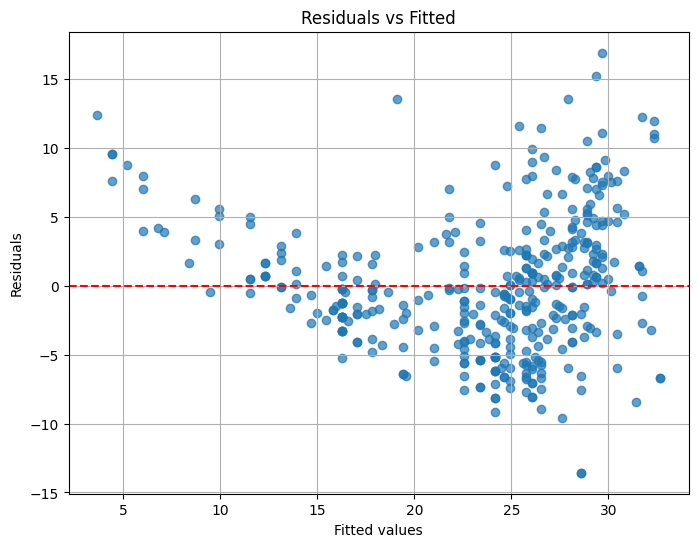

In [7]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

The line does not fit the data very well at all; a different type of graph/line would probably be more effective for interpreting the data than this one. 

In [8]:
!pip install seaborn matplotlib
import seaborn as sns

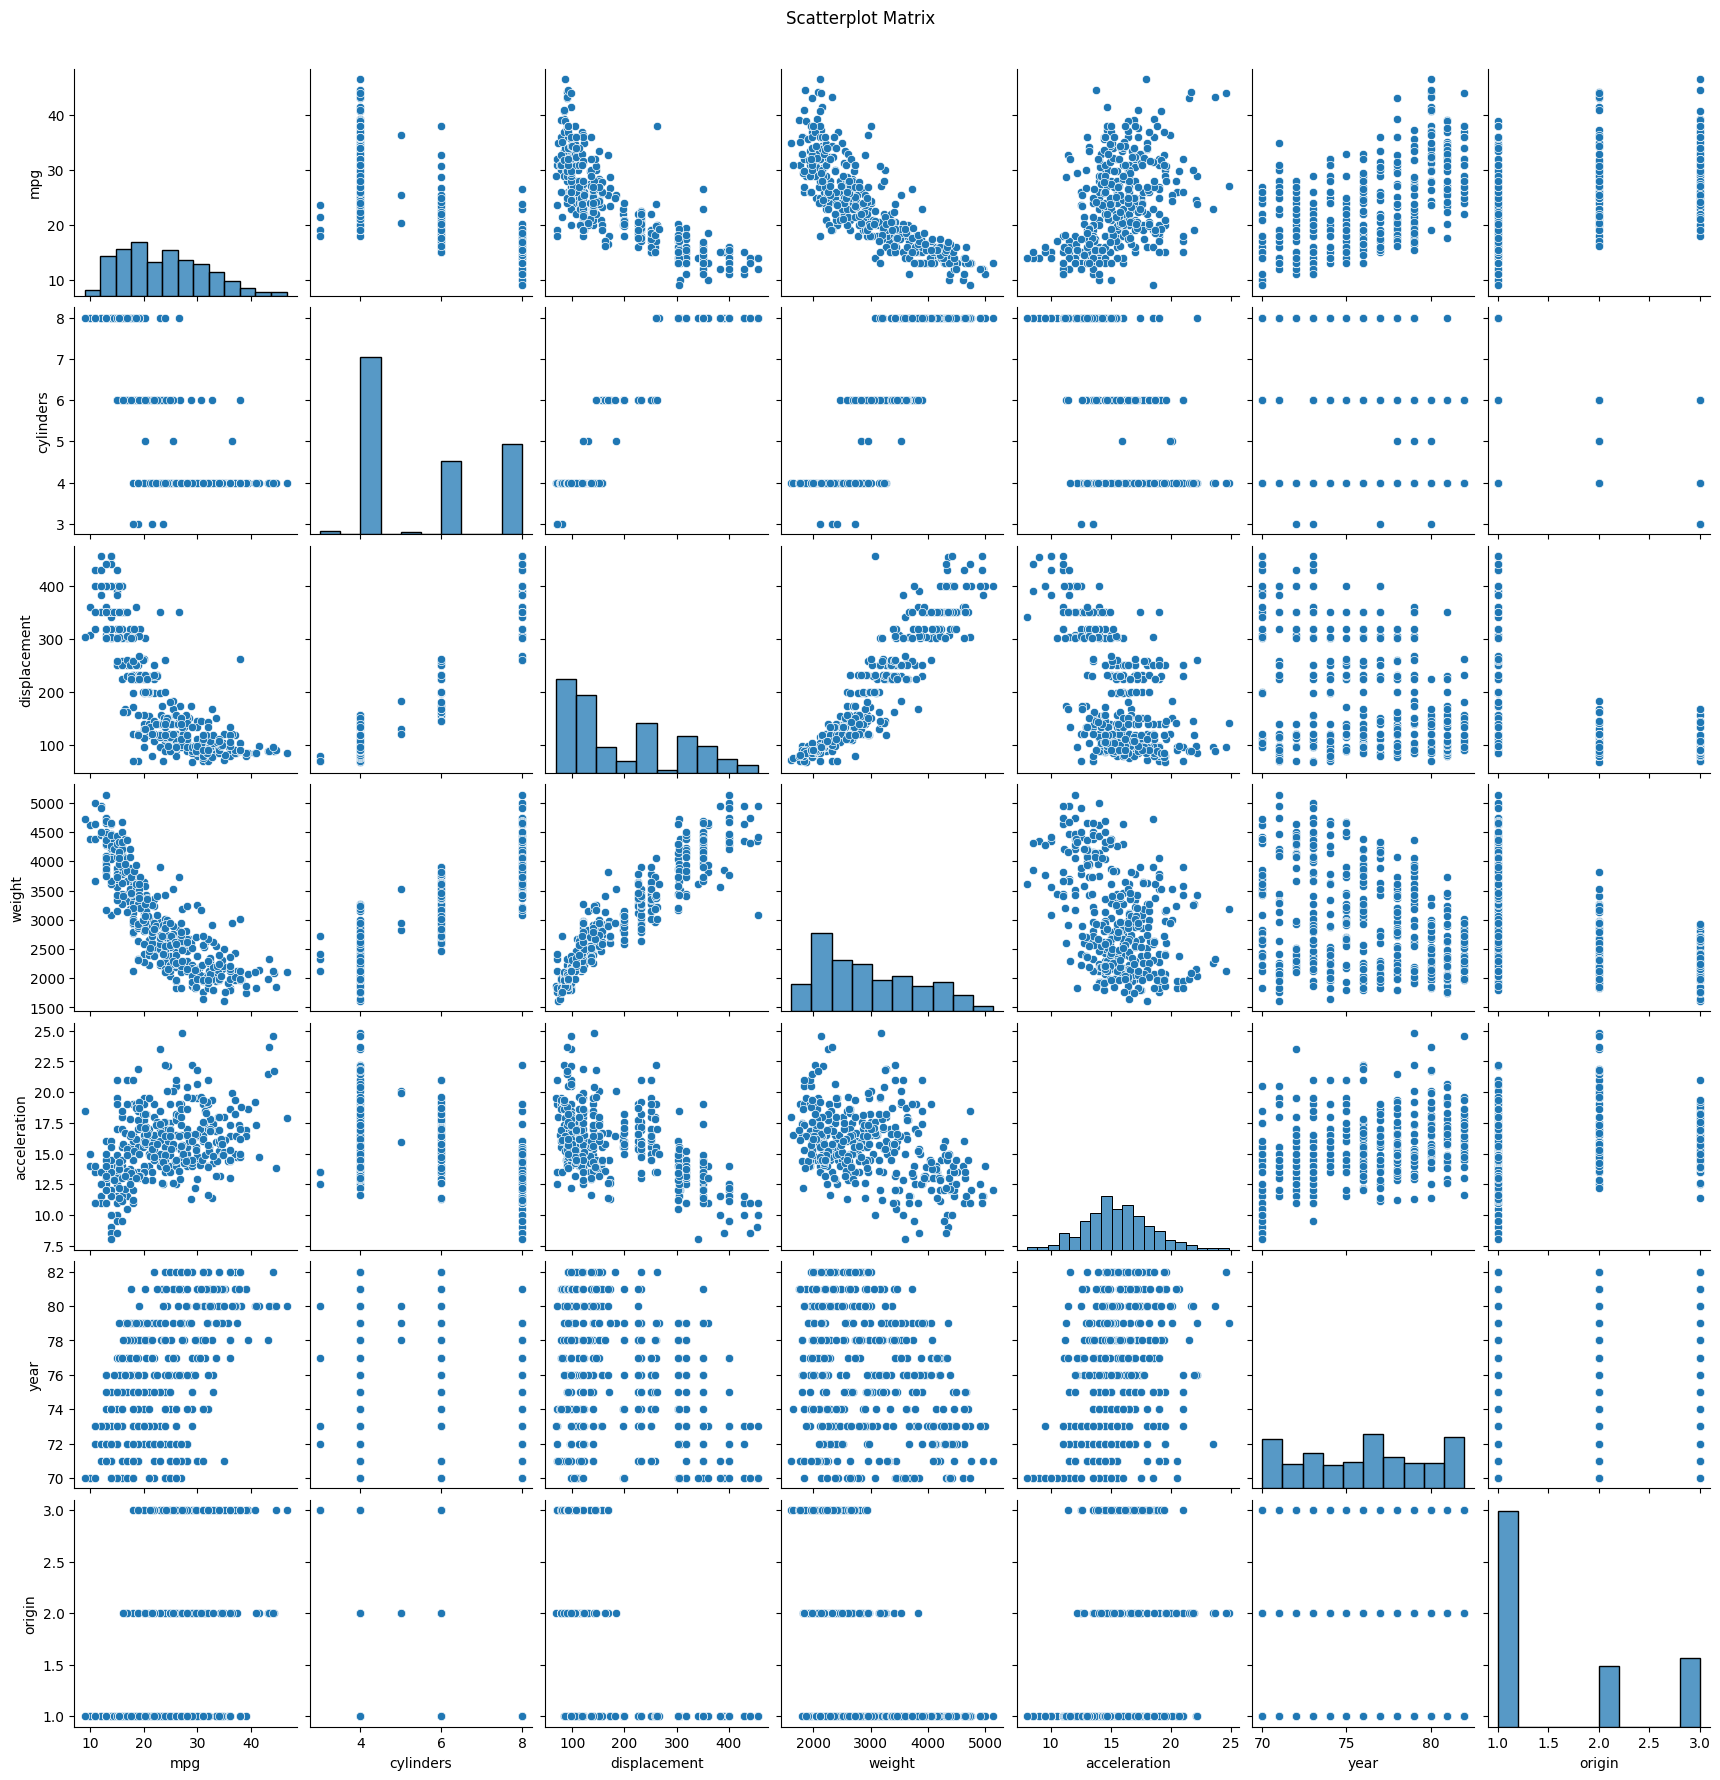

In [9]:
sns.pairplot(auto)
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [10]:
nameless = auto2.drop(columns=['name'])

correlation_matrix = nameless.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
X = nameless.drop(columns=['mpg'])
y = nameless['mpg']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f5cb07630e0>>


This summary shows us that year has a very strong positive correlation with mpg, insinuating that mpg gets better with the newer cars. This summary also shows a strong negative correlation between mpg and cylinders, meaning the more cylinders your car has, the worse gas mileage you will get. Both these things make great sense, as the government pressures car manufacturers to improve their greenhouse gases and the bigger the engine is, the more gas you'll need to fuel it.

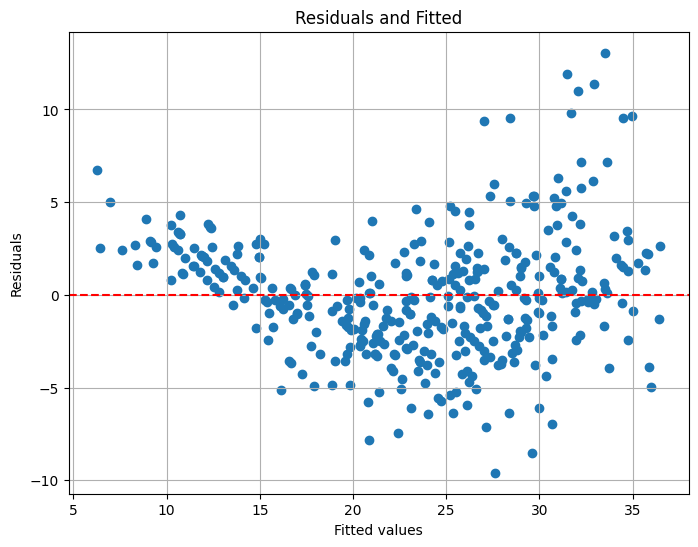

In [12]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals and Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

This graph shows a V-shape with the residuals according to the fitted values. As the fitted values approach 20, residuals are in a constant decrease, but that flips when fitted values get north of 20. As the fitted values approach 30 and 35, there are some outliers.

In [13]:
X['cylinders_weight'] = X['cylinders'] * X['weight']
X['displacement_weight'] = X['displacement'] * X['weight']
X['horsepower_weight'] = X['horsepower'] * X['weight']
X['year_weight'] = X['year'] * X['weight']
X = sm.add_constant(X)
model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          9.63e-160
Time:                        19:08:59   Log-Likelihood:                -963.79
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     380   BIC:                             1999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -63.0153    

The largest interaction is still between cylinders and year, but there is also a strong correlation with weight, which again is very logical.

In [14]:
y = nameless['mpg']
X_log = np.log1p(nameless.drop(columns=['mpg']))
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     305.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.06e-152
Time:                        19:08:59   Log-Likelihood:                -992.17
No. Observations:                 392   AIC:                             2000.
Df Residuals:                     384   BIC:                             2032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -70.8276     17.846     -3.969   

The log transformation is showing high correlation between cylinders, displacement, horsepower, weight, acceleration, and year. The strongest still is year due to the government forcing manufacturers to improve yearly.

In [15]:
X_sqrt = np.sqrt(nameless.drop(columns=['mpg']))
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y, X_sqrt).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          2.17e-145
Time:                        19:08:59   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -49.7981      9.178     -5.426   

The negative coefficients for cylinders, horsepower, weight, and acceleration show that as those increase, gas mileage decreases. Acceleration is the highest correlation, though.

In [16]:
X_square = nameless.drop(columns=['mpg']) ** 2
X_square = sm.add_constant(X_square)
model_square = sm.OLS(y, X_square).fit()
print (model_square.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          3.57e-129
Time:                        19:08:59   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2080      2.356      0.513   

The largest factor is still acceleration, but the year is very close in predicting gas mileage.

In [17]:
carseats = pd.read_csv('Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [18]:
carseats2 = pd.get_dummies(carseats, columns = ['Urban', 'US'], drop_first=True)

carseats2['Urban_Yes'] = carseats2['Urban_Yes'].astype(int)
carseats2['US_Yes'] = carseats2['US_Yes'].astype(int)


X = carseats2[['Price', 'Urban_Yes', 'US_Yes']] 
y = carseats2['Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.39e-23
Time:                        19:08:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

The price coefficient shows relatively significant negative correlation to sales, saying that the higher the prices, the less you'll sell. Being in an urban community shows negative correlation as well, but less than half the correlation of price. There a very large positive correlation between sales and being in the US.
Sales = 13.0435 - 0.0545 - 0.0219 + 1.2006 = epsilon
Price

In [19]:
X_small = carseats2[['Price', 'US_Yes']]
y_small = carseats2['Sales']

X_small = sm.add_constant(X_small)

model_small = sm.OLS(y_small, X_small).fit()

print(model_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.66e-24
Time:                        19:09:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

They both fit, but e fits slightly better.

In [20]:
confidence_intervals = model_small.conf_int(alpha=0.05)
confidence_intervals.columns = ['Lower CI', 'Upper CI']
confidence_intervals

,Lower CI,Upper CI
const,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


In [21]:
boston = pd.read_csv('Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [24]:
X = boston['zn']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.51e-06
Time:                        19:16:37   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

In [25]:
X = boston['indus']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.45e-21
Time:                        19:16:58   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.0

In [26]:
X = boston['chas']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.209
Time:                        19:17:21   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.0

In [27]:
X = boston['nox']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           3.75e-23
Time:                        19:17:36   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.0

In [28]:
X = boston['rm']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           6.35e-07
Time:                        19:17:46   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.0

In [29]:
X = boston['age']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.85e-16
Time:                        19:17:53   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.0

In [30]:
X = boston['dis']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           8.52e-19
Time:                        19:18:02   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.0

In [31]:
X = boston['rad']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.69e-56
Time:                        19:18:12   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.0

In [32]:
X = boston['tax']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.36e-47
Time:                        19:18:19   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.0

In [33]:
X = boston['ptratio']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.94e-11
Time:                        19:18:28   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.0

In [34]:
X = boston['lstat']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.65e-27
Time:                        19:18:35   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.0

In [35]:
X = boston['medv']
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.17e-19
Time:                        19:18:43   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7965      0.934     12.628      0.0

Individual regression models for each preidctor show us that 7 predictors have positive correlation (lstat, ptratio, tax, rad, age, nox, and indus) while 5 have negative correlation (medv, dis, rm, chas, zn). Most of these predictors, however, do not have strong correlation. Only 2 of the positive predictors had a coefficient greater than 1 (ptratio and nox) and the negative predictors produced 3 of these less than -1 (dis, rm, and chas). Nox showed to be the strongest correlation by far with an absurd 31.2485 coefficient. 

In [37]:
X = boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']]
y = boston['crim']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        19:38:43   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

Using all the predictors in one model shows different results, there are now 7 negative predictors and only 5 positive. Only two total predictors have coefficients greater than 1 or less than -1, and both are negative. Dis and nox are the high value coefficients. Nox had the largest difference between the two models, as it went from a positive 30 to almost -10.